In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

salary_info = 'https://richardson.byu.edu/220/ds_salary.csv'


1.) General Salary Data:
---
Start by plotting and describing the general shape of the salary data. This initial
step sets the foundation for your analysis.

In [ ]:
df = pd.read_csv(salary_info)
df.head()

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Text(0.5, 1.0, 'Distribution of Salaries (USD)')

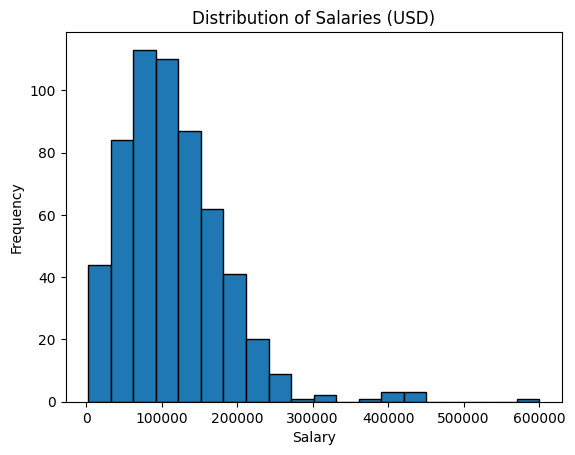

In [ ]:
plt.hist(df["salary_in_usd"], bins=20, edgecolor="black")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Distribution of Salaries (USD)")

Text(0.5, 1.0, 'Average Salaries by Job Title')

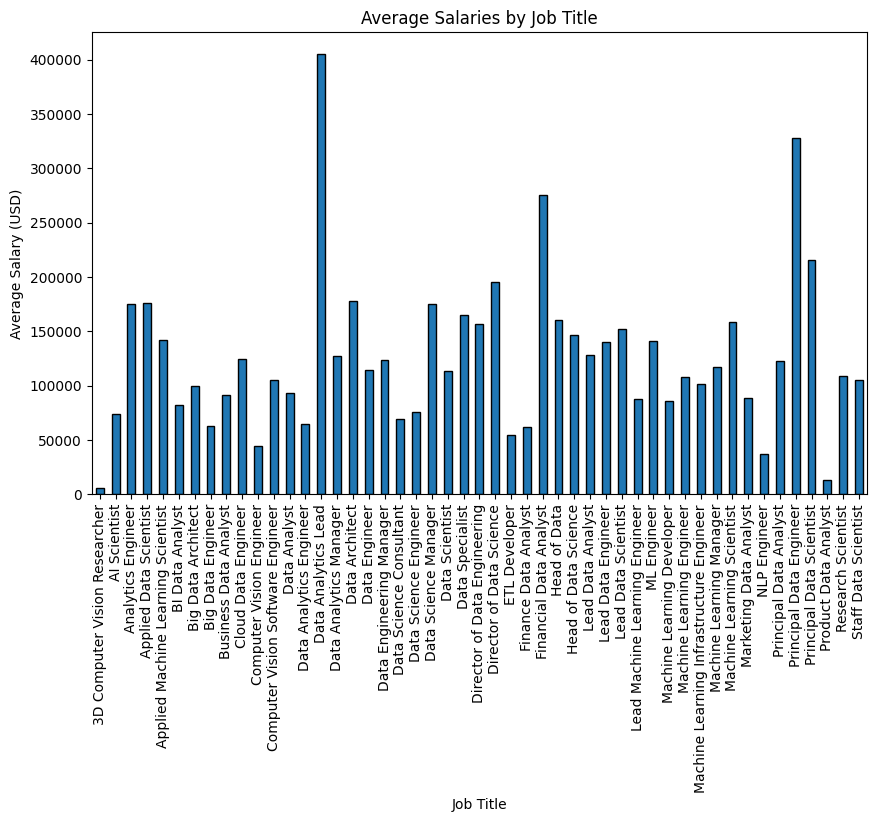

In [ ]:
average_salary_by_title = df.groupby("job_title")["salary_in_usd"].mean()
plt.figure(figsize=(10, 6))
average_salary_by_title.plot(kind="bar", edgecolor="black")
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salaries by Job Title")

2.) Effect of Experience on Salary:
---
Investigate how experience influences data scientist salaries. Create visualizations or
tables to illustrate any trends or patterns.

Text(0.5, 1.0, 'Boxplot of Salaries (USD)')

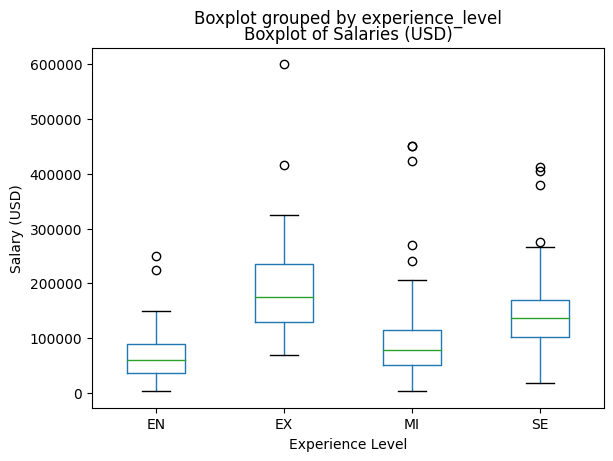

In [ ]:
df.boxplot(column="salary_in_usd", by="experience_level", grid=False)
plt.ylabel("Salary (USD)")
plt.xlabel("Experience Level")
plt.title("Boxplot of Salaries (USD)")

Text(0.5, 1.0, 'Average Salaries by Experience Level')

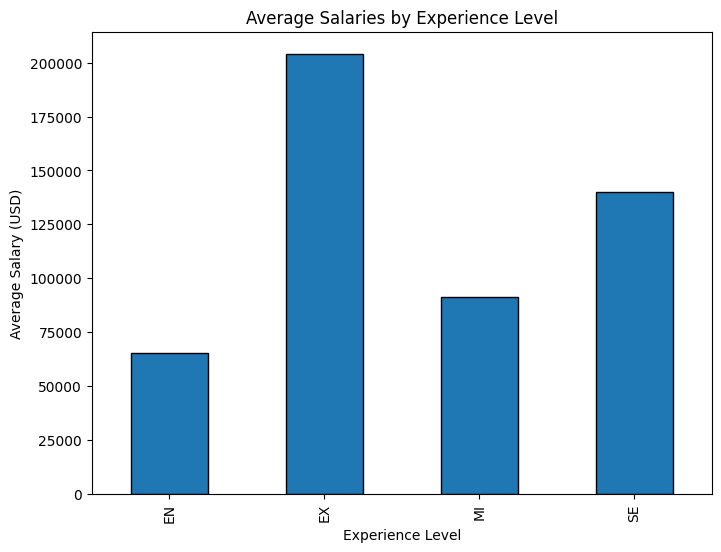

In [ ]:
average_salary_by_experience = df.groupby("experience_level")["salary_in_usd"].mean()
plt.figure(figsize=(8, 6))
average_salary_by_experience.plot(kind="bar", edgecolor="black")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salaries by Experience Level")

3.) Impact of Company Size on Salary:
---
Explore how company size affects data scientist salaries. Generate plots or tables to
visualize this relationship.

Text(0.5, 1.0, 'Boxplot of Salaries (USD)')

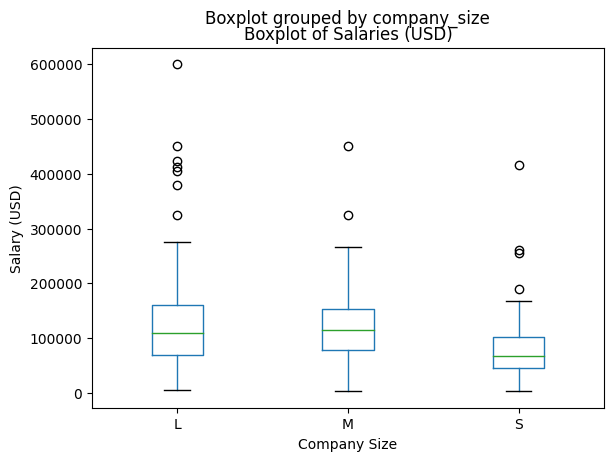

In [ ]:
df.boxplot(column="salary_in_usd", by="company_size", grid=False)
plt.ylabel("Salary (USD)")
plt.xlabel("Company Size")
plt.title("Boxplot of Salaries (USD)")

Text(0.5, 1.0, 'Average Salaries by Company Size')

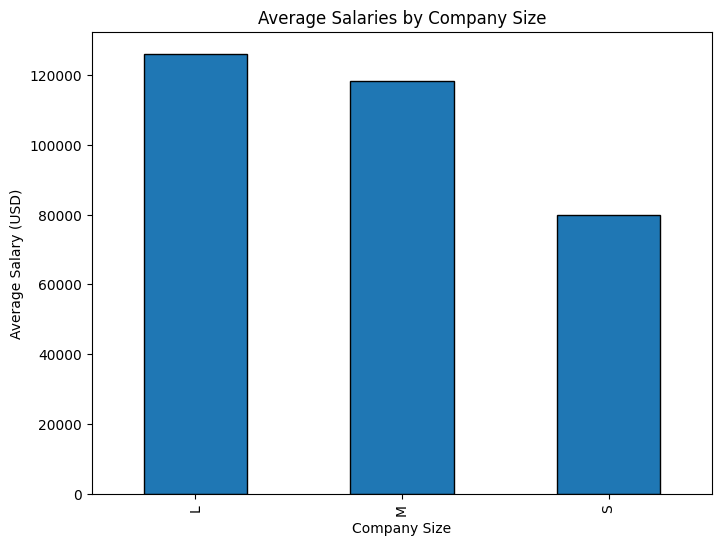

In [ ]:
average_salary_by_experience = df.groupby("company_size")["salary_in_usd"].mean()
plt.figure(figsize=(8, 6))
average_salary_by_experience.plot(kind="bar", edgecolor="black")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salaries by Company Size")

4.) Job Title Analysis:
---
Job titles can vary significantly. For this project, select a keyword or phrase to distinguish between different job titles. For instance, you can differentiate between job
titles containing the word ”Analyst” and those that do not.

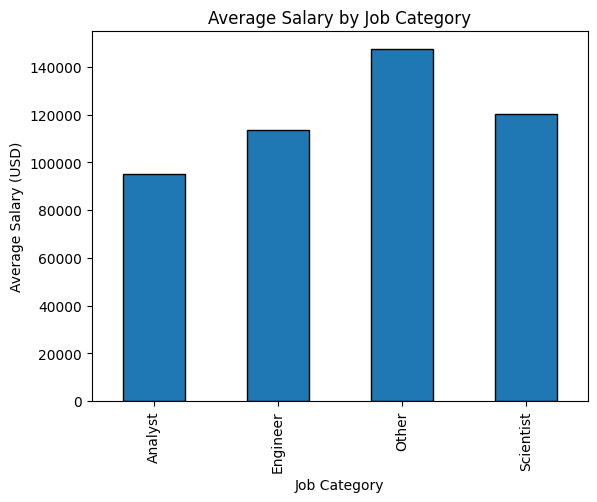

In [ ]:
df['job_category'] = df['job_title'].apply(lambda x:
    'Analyst' if 'analyst' in x.lower() else
    'Scientist' if 'scientist' in x.lower() else
    'Engineer' if 'engineer' in x.lower() else 'Other'
)
df.groupby('job_category')['salary_in_usd'].mean().plot(kind='bar', edgecolor='black')
plt.title('Average Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary (USD)')
plt.show()

The above was made to compare job type salaries to see if there is a significant difference between analyst, engineer, and scientist roles.

5.) Interactions Between Relationships:
---
Investigate potential interactions between the three factors (experience, company size,
and job title). Create a two-way table that displays essential statistics at the intersection of two variables. For instance, construct a table with job titles on the left,
company sizes at the top, and each cell representing the mean salary for each job
title/company size combination.

In [ ]:
pivot_table = df.pivot_table(index=['job_category', 'experience_level'], columns='company_size', values='salary_in_usd', aggfunc='mean')
pivot_table = pivot_table.applymap(lambda x: "{:,.0f}".format(x))
pivot_table


<ipython-input-24-0c8e436398ed>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: "{:,.0f}".format(x))


company_size                         L        M        S
job_category experience_level                           
Analyst      EN                 84,420   53,076   38,391
             EX                150,000  120,000      nan
             MI                 98,947   79,210   46,200
             SE                116,876  112,884   80,000
Engineer     EN                 74,051   55,716   78,731
             EX                339,916  215,333  118,187
             MI                 87,584   82,179   68,622
             SE                148,601  139,820  107,544
Other        EN                 70,332    5,707   88,944
             EX                218,927  151,725   69,741
             MI                150,750   99,019   71,487
             SE                175,994  155,312  168,000
Scientist    EN                 80,000   56,016   59,764
             EX                    nan      nan  416,000
             MI                115,758  109,367   39,276
             SE                159,180  155,097  133,162

6.) Conclusion
---
Summarize your findings by listing all significant relationships you have discovered
during your analysis.

The following is a bullet point list of findings:


*   Generally, the more experience, the higher the earnings
*   Generally, larger companies pay more than smaller companies, however there are exceptions
*Scientists and Engineers make more money than analysts, however there are other job titles that pay more
* There are outliers in each category, meaning some people with less experience make more money than those with more experience, some people at smaller comapanies make more money than those at larger companies, some analysts make more than engineers, etc.


